# Surface plasmon resonance analysis for putatively epistatic combinations

In [1]:
# pip install --quiet git+https://github.com/WSDeWitt/sprf

In [2]:
# pip install --quiet -e ../../sprf

In [3]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sprf

/Users/wdewitt/miniconda3/envs/replay/lib/python3.9/site-packages/jax/_src/lib/__init__.py:34: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [4]:
files = glob.glob("/Users/wdewitt/Downloads/Kinetics/*")
files

['/Users/wdewitt/Downloads/Kinetics/A7 S109(L)R 180nm.txt',
 '/Users/wdewitt/Downloads/Kinetics/C6 WT 20nm.txt',
 '/Users/wdewitt/Downloads/Kinetics/A6 WT 180nm.txt',
 '/Users/wdewitt/Downloads/Kinetics/E6 A105(H)G 180nm.txt',
 '/Users/wdewitt/Downloads/Kinetics/B6 WT 60nm.txt',
 '/Users/wdewitt/Downloads/Kinetics/F6 A105(H)G 60nm.txt',
 '/Users/wdewitt/Downloads/Kinetics/D7  S109(L)R 6.67nm.txt',
 '/Users/wdewitt/Downloads/Kinetics/G7 A105(H)G +  S109(L)R 20nm.txt',
 '/Users/wdewitt/Downloads/Kinetics/C7  S109(L)R 20nm.txt',
 '/Users/wdewitt/Downloads/Kinetics/F7 A105(H)G +  S109(L)R 60nm.txt',
 '/Users/wdewitt/Downloads/Kinetics/H7 A105(H)G +  S109(L)R 6.67nm.txt',
 '/Users/wdewitt/Downloads/Kinetics/D6 WT 6.67nm.txt',
 '/Users/wdewitt/Downloads/Kinetics/G6 A105(H)G 20nm.txt',
 '/Users/wdewitt/Downloads/Kinetics/H6 A105(H)G 6.67nm.txt',
 '/Users/wdewitt/Downloads/Kinetics/E7 A105(H)G +  S109(L)R 180nm.txt',
 '/Users/wdewitt/Downloads/Kinetics/B7  S109(L)R 60nm.txt']

In [32]:
variants = []
c = []
dfs = []
dfs_fit = []
for file in files:
    variant = file.split("/")[-1][3:].rstrip(".txt")
    variants.append(variant)
    with open(file, "r") as f:
        c.append(float(f.readline().split()[1]))
        df = pd.read_csv(f, sep="\t", skiprows=6, index_col=0, header=0)
        dfs.append(df.Data1.rename(variant))
        dfs_fit.append(df.Fit1.rename(variant))

df = pd.concat(dfs, axis=1)
df_fit = pd.concat(dfs_fit, axis=1)

c = pd.Series(c, name="concentration (M)", index=variants)

df

,S109(L)R 180nm,WT 20nm,WT 180nm,A105(H)G 180nm,WT 60nm,A105(H)G 60nm,S109(L)R 6.67nm,A105(H)G + S109(L)R 20nm,S109(L)R 20nm,A105(H)G + S109(L)R 60nm,A105(H)G + S109(L)R 6.67nm,WT 6.67nm,A105(H)G 20nm,A105(H)G 6.67nm,A105(H)G + S109(L)R 180nm,S109(L)R 60nm
Time1,,,,,,,,,,,,,,,,
240.0,-0.007976,0.000032,-0.010995,-0.004378,-0.009580,0.000201,-0.009419,-0.003771,-0.008405,-0.002166,-0.002753,-0.004746,-0.000878,-0.006964,0.000479,-0.005747
240.2,-0.005729,0.000557,-0.009625,-0.000662,-0.009518,0.001432,-0.008623,-0.003449,-0.008096,-0.000770,-0.002544,-0.004616,0.000167,-0.006699,0.004246,-0.004951
240.4,-0.002644,0.001040,-0.007964,0.003008,-0.009577,0.003018,-0.007882,-0.002850,-0.007450,0.000308,-0.002092,-0.004289,0.000668,-0.006240,0.008824,-0.004003
240.6,0.000635,0.001583,-0.005886,0.007456,-0.009436,0.004117,-0.006855,-0.002087,-0.006703,0.001948,-0.001601,-0.003782,0.001713,-0.005673,0.014350,-0.002894
240.8,0.004100,0.002431,-0.003565,0.012186,-0.009208,0.005847,-0.005773,-0.001354,-0.005773,0.003648,-0.000944,-0.003499,0.002417,-0.005292,0.020211,-0.001901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839.0,0.306195,0.065064,0.174542,0.211558,0.105546,0.123838,0.060670,0.172464,0.112372,0.202850,0.121797,0.032938,0.076009,0.050198,0.265346,0.185070
839.2,0.305886,0.065152,0.174599,0.210990,0.105788,0.123880,0.060337,0.172011,0.111834,0.202838,0.121692,0.032899,0.076002,0.050124,0.265727,0.184916
839.4,0.305441,0.064949,0.174618,0.210636,0.105921,0.123947,0.060217,0.171784,0.111577,0.203038,0.121649,0.032763,0.075669,0.049715,0.266279,0.184818


In [33]:
c

S109(L)R 180nm                 1.800000e-07
WT 20nm                        2.000000e-08
WT 180nm                       1.800000e-07
A105(H)G 180nm                 1.800000e-07
WT 60nm                        6.000000e-08
A105(H)G 60nm                  6.000000e-08
 S109(L)R 6.67nm               6.670000e-09
A105(H)G +  S109(L)R 20nm      2.000000e-08
 S109(L)R 20nm                 2.000000e-08
A105(H)G +  S109(L)R 60nm      6.000000e-08
A105(H)G +  S109(L)R 6.67nm    6.670000e-09
WT 6.67nm                      6.670000e-09
A105(H)G 20nm                  2.000000e-08
A105(H)G 6.67nm                6.670000e-09
A105(H)G +  S109(L)R 180nm     1.800000e-07
 S109(L)R 60nm                 6.000000e-08
Name: concentration (M), dtype: float64

In [7]:
sprdata = sprf.SPRdata(df.index.values, df.values.T, c.values)
# sprdata = sprf.SPRdata(df.index.values, df.values.T, 6e-8 * np.ones(len(df)))

In [40]:
sprdata.fit(t_a=240, t_d=540, mask_half_width=5, polish=True)

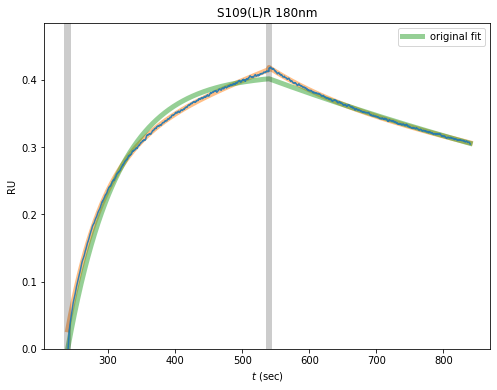

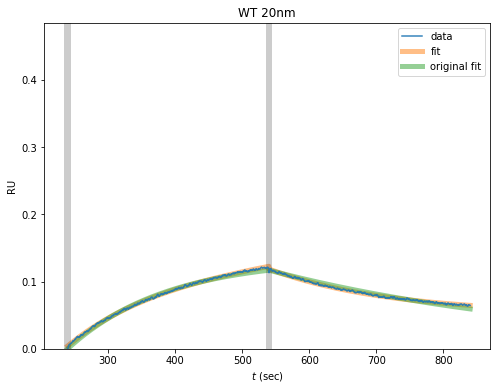

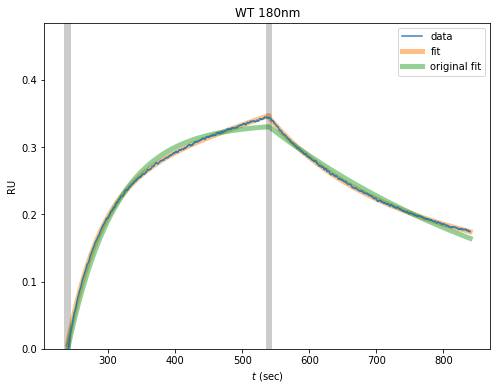

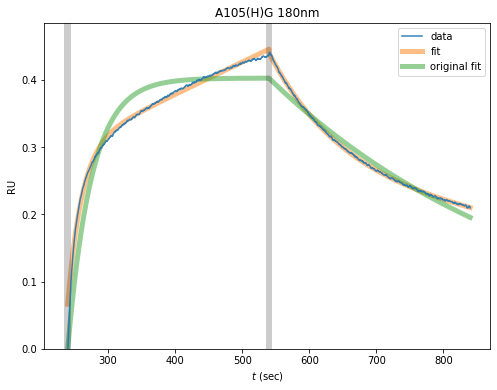

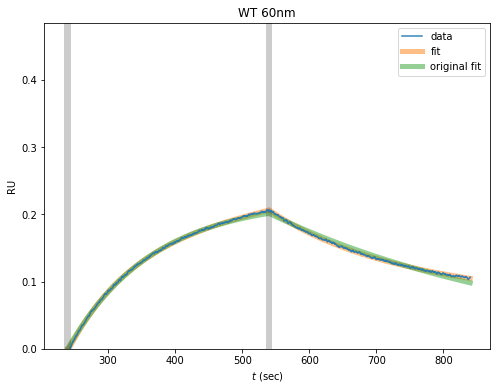

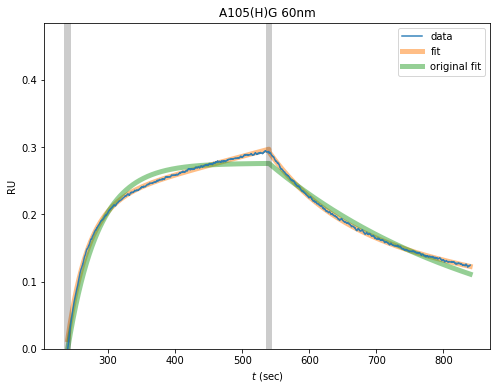

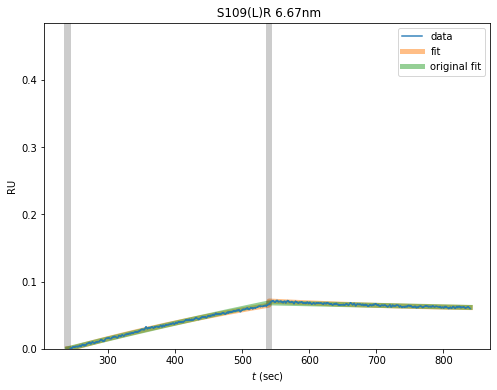

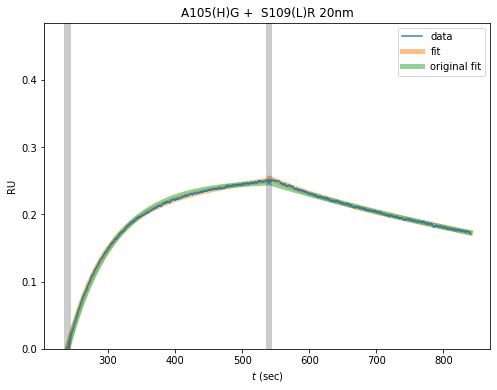

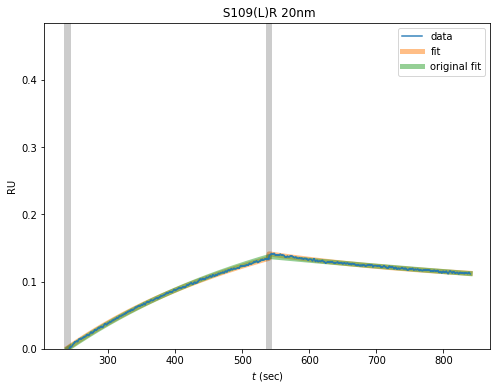

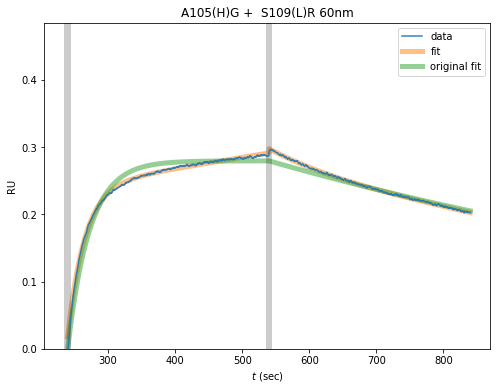

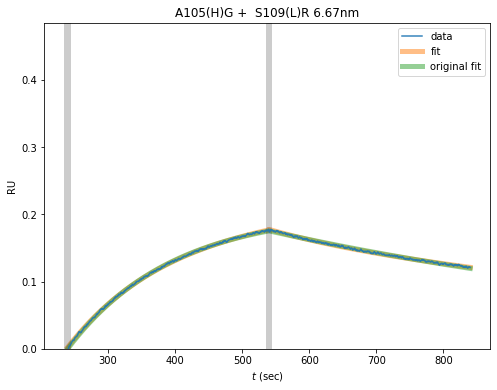

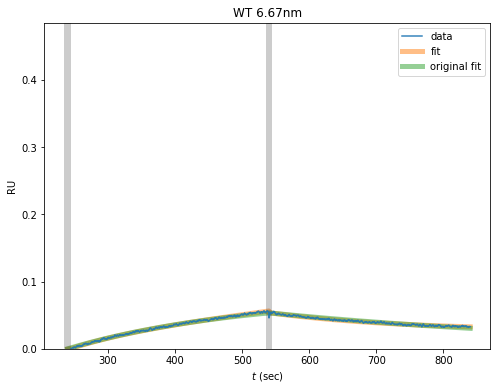

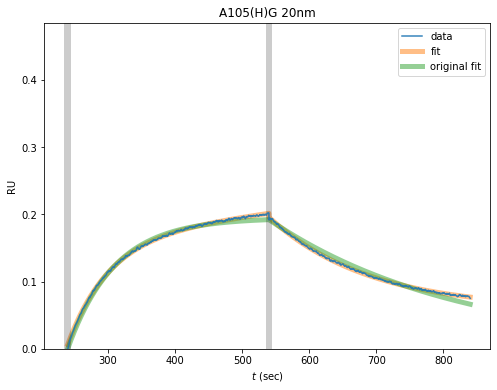

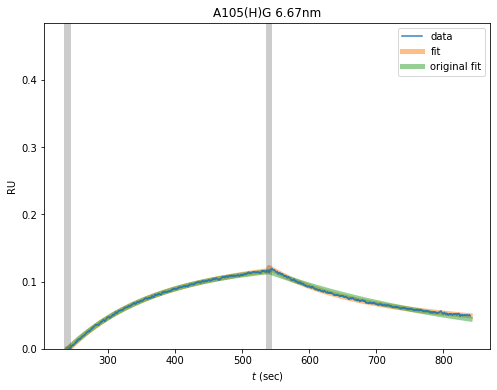

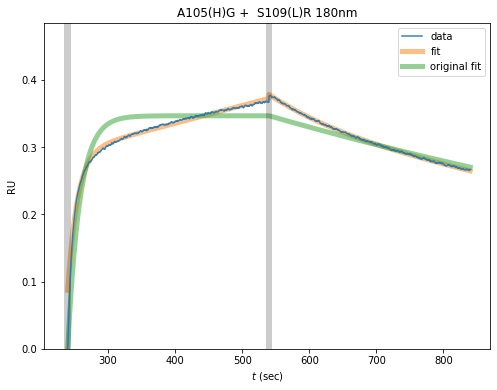

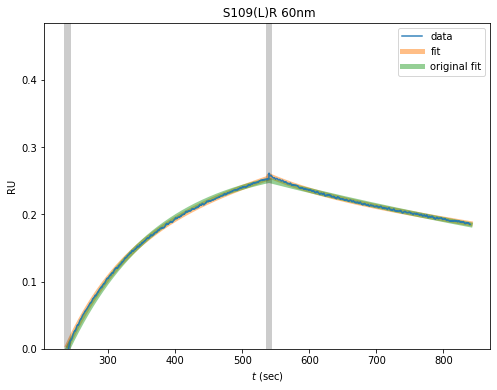

In [41]:
for i, variant in enumerate(df.columns):
    plt.figure(figsize=(8, 6))
    sprdata.plot(i)
    plt.plot(df_fit.index, df_fit.iloc[:, i], label="original fit", alpha=0.5, lw=5, zorder=-1)
    plt.ylim(0, 1.1 * df.values.max())
    plt.title(variant)
    plt.legend()
    plt.show()

In [42]:
fit = sprdata.param_df()
fit.index = df.columns
fit["log10Ka"] = -np.log10(fit.K_D)
fit = fit.sort_index()

In [43]:
fit[["k_on", "k_off", "log10Ka", "RMSD"]]

,k_on,k_off,log10Ka,RMSD
S109(L)R 20nm,4.309794e-08,0.003785,-4.943577,0.000820
S109(L)R 6.67nm,9.331663e-02,0.001404,1.822658,0.000860
S109(L)R 60nm,1.650884e-12,0.010666,-9.810289,0.000740
A105(H)G + S109(L)R 180nm,3.411624e+05,0.008396,7.608914,0.002077
A105(H)G + S109(L)R 20nm,4.791940e+05,0.008364,7.758084,0.000787
A105(H)G + S109(L)R 6.67nm,1.955692e+05,0.005684,7.536666,0.000772
A105(H)G + S109(L)R 60nm,5.090137e+05,0.009326,7.737041,0.001417
A105(H)G 180nm,2.155897e+05,0.009341,7.363230,0.002877
A105(H)G 20nm,4.967476e+05,0.006581,7.877848,0.000853
A105(H)G 6.67nm,4.420406e-11,0.009278,-8.321985,0.000768


In [44]:
sprdata.param_df()

,baseline_drift_a,baseline_drift_d,k_on,k_off,t_a,r_a,r_d,r_b,K_D,RMSD
0,0.000385,-0.000218,5.751592e+04,0.008431,235.090197,0.298966,0.418407,3.674352e-01,1.465771e-07,0.001132
1,0.000136,0.000002,1.328858e+05,0.005561,235.000000,0.088598,0.118593,5.145591e-02,4.184770e-08,0.000872
2,0.000334,-0.000146,7.217301e+04,0.007319,238.707386,0.247089,0.343820,2.022265e-01,1.014117e-07,0.000955
3,0.000482,-0.000177,2.155897e+05,0.009341,235.000000,0.298794,0.439905,2.515968e-01,4.332810e-08,0.002877
4,0.000181,-0.000064,7.521962e+04,0.006396,241.948163,0.158470,0.206670,1.098200e-01,8.503137e-08,0.000766
5,0.000267,-0.000140,3.901083e+05,0.009252,238.080826,0.216265,0.292778,1.557820e-01,2.371692e-08,0.001161
6,-0.000046,0.000049,9.331663e-02,0.001404,243.007477,0.230493,0.071027,5.891759e-07,1.504326e-02,0.000860
7,0.000129,-0.000179,4.791940e+05,0.008364,239.504301,0.213221,0.254062,2.239518e-01,1.745483e-08,0.000787
8,0.000084,-0.000018,4.309794e-08,0.003785,238.252592,0.160682,0.141230,1.065422e-01,8.781664e+04,0.000820
9,0.000167,-0.000204,5.090137e+05,0.009326,238.112783,0.240979,0.297662,2.616033e-01,1.832143e-08,0.001417
